# Minimum Wage Data by State and Country
This notebook runs through two different analyses on minimum wage:
1. Minimum Wage by State - identifying trends in minimum wage by state, and how this changes over the last decade.
2. Minimum Wage by Country - tracking minimum wage trends by country over the same time period, and identifying any underlying patterns among countries with similar trends.

## Minimum Wage by State

In [2]:
import pandas as pd
min_wage_by_state = pd.read_csv("C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/LaborLawCenter-MinWageByState.csv")
min_wage_by_state.set_index('State', inplace = True)

In [3]:
min_wage_by_state.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,
Alabama,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
Alaska,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84,9.89,10.19,10.34
Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,11.00,12.00,12.15
Arkansas,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.50,9.25,10.00,11.00
California,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00,12.00,13.00,14.00


In [4]:
# Feature engineering - adding a % change column to see increases by state
min_wage_by_state['% Change'] = min_wage_by_state['2021'] / min_wage_by_state['2010'] - 1

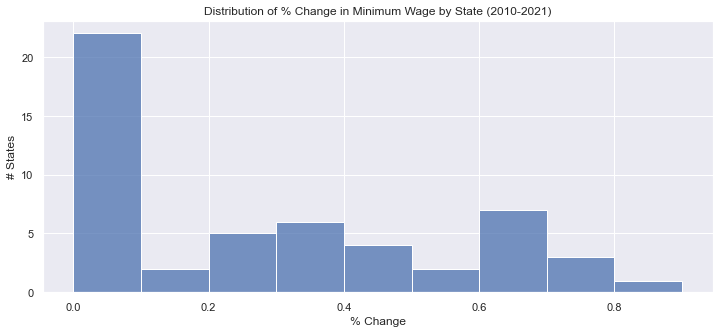

In [12]:
# Setting up Data Vis
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme()

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(min_wage_by_state['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage by State (2010-2021)', xlabel = "% Change", ylabel = "# States")

Graph above shows that roughly half of states in the US haven't raised their minimum wage by a significant amount over the last decade.

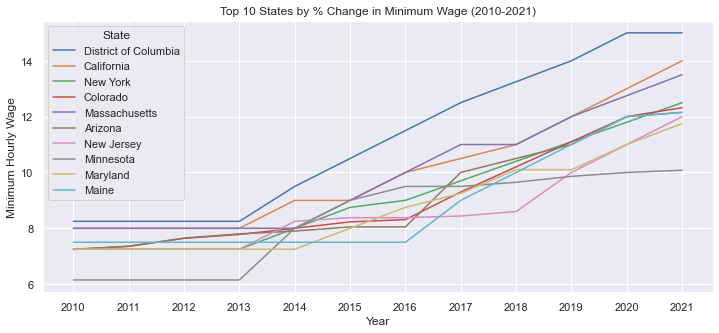

In [15]:
graph_data = min_wage_by_state.sort_values(by = '% Change', ascending = False)[0:10].drop(columns = ['% Change'])
graph_data = pd.melt(graph_data.reset_index(), id_vars = "State")

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'variable', hue = 'State', y = 'value')
g = g.set(title = 'Top 10 States by % Change in Minimum Wage (2010-2021)', xlabel = 'Year', ylabel = 'Minimum Hourly Wage')

Graph above shows that even states with steadily increasing minimum wage policies implemented minimal changes from 2010 through 2013. Need to do some further digging to understand if this is a data issue or a change in federal policy.

## Minimum Wage by Country
This data comes in two parts - the minimum wage by country by year (OECD data) and the country characteristics by country in 2020 (World Bank data).

In [258]:
# OECD Data
min_wage_by_country = pd.read_excel('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/OECD-MinWageByCountry.xlsx',
                                   skiprows = 5)
min_wage_by_country.drop(columns = ['Source type', 'Unnamed: 6', 'Local currency', '2017 PPP $'], inplace = True)
min_wage_by_country.rename(columns = {'Reference area': 'Country Name'}, inplace = True)
min_wage_by_country['Time'] = min_wage_by_country['Time'].astype('int')
min_wage_by_country.set_index(['Country Name', 'Time'], inplace = True)
min_wage_by_country.head()

U.S. dollars
Country Name Time              
Afghanistan  2010         86.11
             2011        106.96
             2012         98.19
             2013         90.29
             2015         81.77

In [259]:
# World Bank Data
world_dev_ind = pd.read_csv('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/WorldBank-WDIByCountry.csv')
world_dev_ind.drop(columns = ['Country Code', 'Indicator Code', 'Unnamed: 65'], inplace = True)
world_dev_ind.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,"Access to electricity, urban (% of urban popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [260]:
#1440 unique indicators per country is far too many:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10000, 'display.max_colwidth', 100):
    display(pd.Series(world_dev_ind['Indicator Name'].unique()))

0                                      Access to clean fuels and technologies for cooking (% of population)
1                                                                   Access to electricity (% of population)
2                                                      Access to electricity, rural (% of rural population)
3                                                      Access to electricity, urban (% of urban population)
4       Account ownership at a financial institution or with a mobile-money-service provider (% of popul...
5       Account ownership at a financial institution or with a mobile-money-service provider, female (% ...
6       Account ownership at a financial institution or with a mobile-money-service provider, male (% of...
7       Account ownership at a financial institution or with a mobile-money-service provider, older adul...
8       Account ownership at a financial institution or with a mobile-money-service provider, poorest 40...
9       Account ownership at

In [261]:
# Arbitrarily picking some interesting indicators
narrow_indicators = [                    
                     # GDP-related indicators
                     'GDP (current US$)',
                     'GDP growth (annual %)',
                     'Trade (% of GDP)',
                     'Current health expenditure (% of GDP)',
                     'Tax revenue (% of GDP)',
                     'Military expenditure (% of GDP)',
                     
                     # Income disparity
                     'Income share held by lowest 20%',
                     'Income share held by fourth 20%',
                     
                     # Gender disparity
                     'Labor force, female (% of total labor force)',
                     'Women Business and the Law Index Score (scale 1-100)',

                     # Other stats
                     'Land area (sq. km)',
                     'Air transport, passengers carried',
                     'CO2 emissions (kt)',
                     'Labor force, total',
                     'Population, total',
                     'Urban population (% of total population)',
                     'Current health expenditure per capita (current US$)',
                     'Ease of doing business score (0 = lowest performance to 100 = best performance)'
                     ]

# Filtering down the dataset
world_dev_ind = world_dev_ind[world_dev_ind['Indicator Name'].isin(narrow_indicators)]

In [262]:
# Pivoting and unpivoting data to get indicators above from 2010-2020 in a usable format
world_dev_ind = pd.melt(world_dev_ind, id_vars = ['Country Name', 'Indicator Name'], var_name = 'Time')
world_dev_ind['Time'] = world_dev_ind['Time'].astype('int')
world_dev_ind = world_dev_ind[world_dev_ind['Time'] > 2009]
world_dev_ind= pd.pivot(world_dev_ind, index = ['Country Name', 'Time'], columns = ['Indicator Name'], values = ['value'])
world_dev_ind.columns = pd.Series(narrow_indicators).sort_values()

# Final datatset
world_dev_ind.head()

Air transport, passengers carried  CO2 emissions (kt)  \
Country Name Time                                                          
Afghanistan  2010                       1.999127e+06            8463.436   
             2011                       2.279341e+06           12240.446   
             2012                       1.737962e+06           10755.311   
             2013                       2.044188e+06            9050.156   
             2014                       2.209428e+06            8467.103   

                   Current health expenditure (% of GDP)  \
Country Name Time                                          
Afghanistan  2010                               8.569672   
             2011                               8.561907   
             2012                               7.897168   
             2013                               8.805964   
             2014                               9.528878   

                   Current health expenditure per capita (current US$)  \
Country Name Time                                                        
Afghanistan  2010                                          44.990532     
             2011                                          50.853474     
             2012                                          51.440262     
             2013                                          55.034630     
             2014                                          59.008934     

                   Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country Name Time                                                                                    
Afghanistan  2010                                                NaN                                 
             2011                                                NaN                                 
             2012                                                NaN                                 
             2013                                                NaN                                 
             2014                                                NaN                                 

                   GDP (current US$)  GDP growth (annual %)  \
Country Name Time                                             
Afghanistan  2010       1.585657e+10              14.362441   
             2011       1.780429e+10               0.426355   
             2012       2.000160e+10              12.752287   
             2013       2.056107e+10               5.600745   
             2014       2.048489e+10               2.724543   

                   Income share held by fourth 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2014                              NaN   

                   Income share held by lowest 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2014                              NaN   

                   Labor force, female (% of total labor force)  \
Country Name Time                                                 
Afghanistan  2010                                     15.366971   
             2011                                     15.703252   
             2012                                     16.114022   
             2013                                     16.959322   
             2014                                     17.848257   

                   Labor force, total  Land area (sq. km)  \
Country Name Time                                           
Afghanistan  2010           7173385.0  

In [263]:
# Join the data 
min_wage_by_country = min_wage_by_country.merge(world_dev_ind, how = 'inner', on = ['Country Name', 'Time'])
min_wage_by_country.head()

U.S. dollars  Air transport, passengers carried  \
Country Name Time                                                    
Afghanistan  2010         86.11                       1.999127e+06   
             2011        106.96                       2.279341e+06   
             2012         98.19                       1.737962e+06   
             2013         90.29                       2.044188e+06   
             2015         81.77                       1.929907e+06   

                   CO2 emissions (kt)  Current health expenditure (% of GDP)  \
Country Name Time                                                              
Afghanistan  2010            8463.436                               8.569672   
             2011           12240.446                               8.561907   
             2012           10755.311                               7.897168   
             2013            9050.156                               8.805964   
             2015            9035.488                              10.105348   

                   Current health expenditure per capita (current US$)  \
Country Name Time                                                        
Afghanistan  2010                                          44.990532     
             2011                                          50.853474     
             2012                                          51.440262     
             2013                                          55.034630     
             2015                                          58.906528     

                   Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country Name Time                                                                                    
Afghanistan  2010                                                NaN                                 
             2011                                                NaN                                 
             2012                                                NaN                                 
             2013                                                NaN                                 
             2015                                           39.25519                                 

                   GDP (current US$)  GDP growth (annual %)  \
Country Name Time                                             
Afghanistan  2010       1.585657e+10              14.362441   
             2011       1.780429e+10               0.426355   
             2012       2.000160e+10              12.752287   
             2013       2.056107e+10               5.600745   
             2015       1.990711e+10               1.451315   

                   Income share held by fourth 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2015                              NaN   

                   Income share held by lowest 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2015                              NaN   

                   Labor force, female (% of total labor force)  \
Country Name Time                                                 
Afghanistan  2010                                     15.366971   
             2011                                     15.703252   
             2012                                     16.114022   
             2013                                     16.959322   
             2015                                     18.786208   

                   Labor force, total  Land area (sq. km)  \
Co

In [264]:
min_wage_by_country = min_wage_by_country.reset_index()

## Main Analysis
Now that we have the dataset above with selected World Bank indicators by country by year, we can start diving into some analysis.

In [265]:
g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 
       'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom',
       'United States']
g7 = ['United States', 'United Kingdom', 'France', 'Japan', 'Germany', 'Italy', 'Canada']

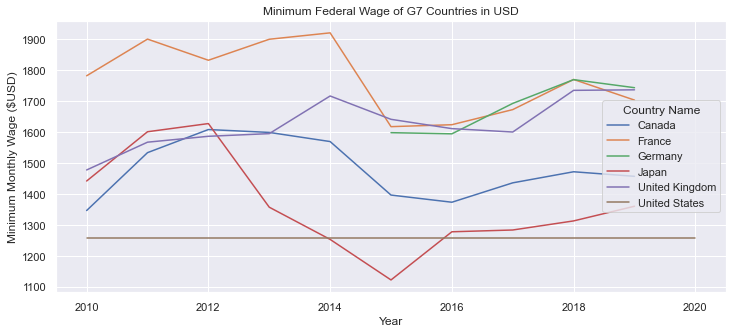

In [266]:
graph_data = min_wage_by_country[min_wage_by_country['Country Name'].isin(g7)]
graph_data

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country Name', y = 'U.S. dollars')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in USD', xlabel = 'Year', ylabel = 'Minimum Monthly Wage ($USD)')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


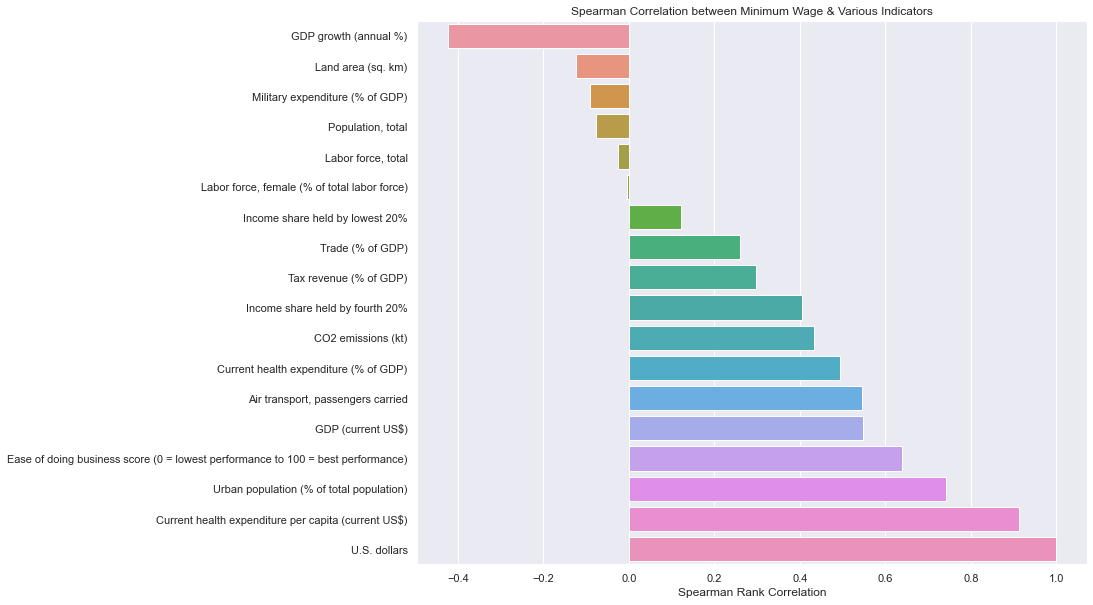

In [267]:
# Identifying correlation between minimum monthly wage and World Bank Indicators
graph_data = min_wage_by_country[min_wage_by_country.columns[2:]].corr(method = 'spearman')['U.S. dollars'][:-1].sort_values()

plt.figure(figsize=(12, 10))
g = sns.barplot(graph_data.values, graph_data.index)
g = g.set(title = 'Spearman Correlation between Minimum Wage & Various Indicators', 
          xlabel = 'Spearman Rank Correlation')

According to the chart above, higher health expenditure, higher % urban population, and higher ease of doing business all are all positiviely correlated with minimum monthly wages. However, countries with a high GDP annual growth tend to have lower minimum wages, as do countries with greater land area and military expenditure.

In [268]:
min_wage_by_country.head()

,Country Name,Time,U.S. dollars,"Air transport, passengers carried",CO2 emissions (kt),Current health expenditure (% of GDP),Current health expenditure per capita (current US$),Ease of doing business score (0 = lowest performance to 100 = best performance),GDP (current US$),GDP growth (annual %),...,Income share held by lowest 20%,"Labor force, female (% of total labor force)","Labor force, total",Land area (sq. km),Military expenditure (% of GDP),"Population, total",Tax revenue (% of GDP),Trade (% of GDP),Urban population (% of total population),Women Business and the Law Index Score (scale 1-100)
0,Afghanistan,2010,86.11,1.999127e+06,8463.436,8.569672,44.990532,NaN,1.585657e+10,14.362441,...,NaN,15.366971,7173385.0,652860.0,1.945836,29185507.0,9.169752,NaN,23.737,28.8
1,Afghanistan,2011,106.96,2.279341e+06,12240.446,8.561907,50.853474,NaN,1.780429e+10,0.426355,...,NaN,15.703252,7499332.0,652860.0,1.821345,30117413.0,8.916794,NaN,23.948,28.8
2,Afghanistan,2012,98.19,1.737962e+06,10755.311,7.897168,51.440262,NaN,2.000160e+10,12.752287,...,NaN,16.114022,7891605.0,652860.0,1.175416,31161376.0,7.707801,NaN,24.160,28.8
3,Afghanistan,2013,90.29,2.044188e+06,9050.156,8.805964,55.034630,NaN,2.056107e+10,5.600745,...,NaN,16.959322,8307325.0,652860.0,1.076950,32269589.0,7.122773,NaN,24.373,28.8
4,Afghanistan,2015,81.77,1.929907e+06,9035.488,10.105348,58.906528,39.25519,1.990711e+10,1.451315,...,NaN,18.786208,9176450.0,652860.0,0.994576,34413603.0,7.579408,NaN,24.803,28.8


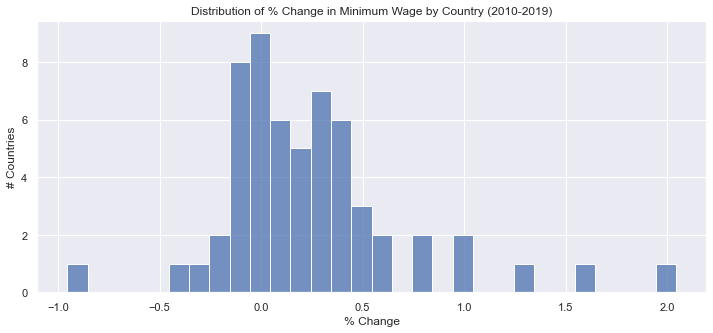

In [269]:
graph_data = min_wage_by_country.pivot(index = ['Country Name'], columns = ['Time'], values = ['U.S. dollars'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[9] / graph_data[0] - 1
graph_data

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage by Country (2010-2019)', xlabel = "% Change", ylabel = "# Countries")

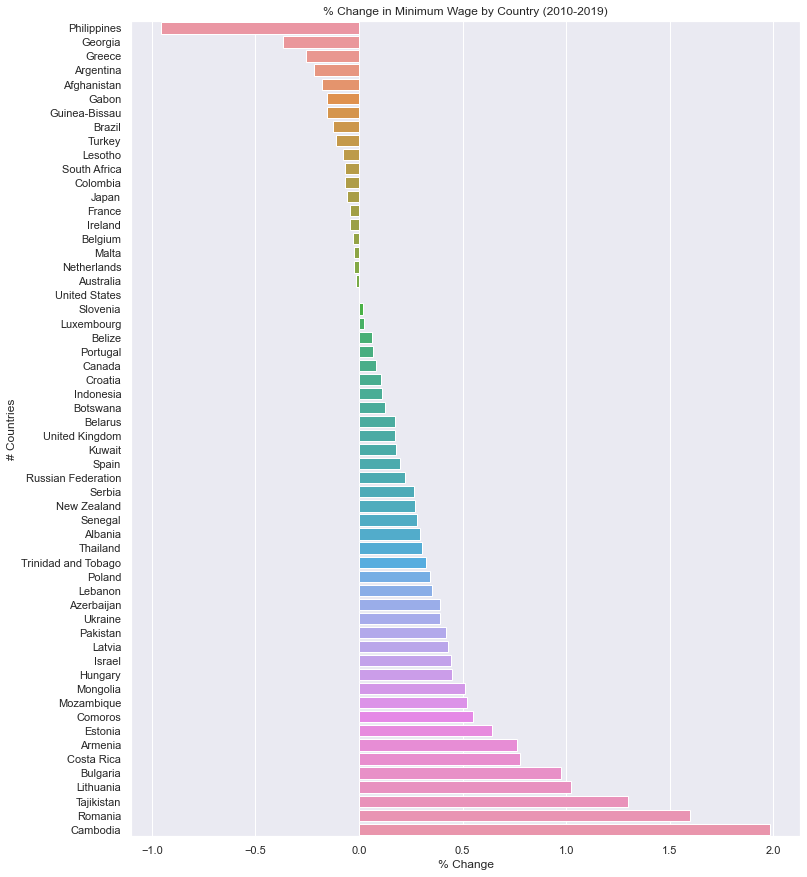

In [284]:
graph_data = min_wage_by_country.pivot(index = ['Country Name'], columns = ['Time'], values = ['U.S. dollars'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[9] / graph_data[0] - 1
graph_data = graph_data['% Change'].sort_values().reset_index().dropna()
graph_data

# Graph
plt.figure(figsize=(12, 15))
g = sns.barplot(data = graph_data, x = '% Change', y = 'Country Name')
g = g.set(title = '% Change in Minimum Wage by Country (2010-2019)', xlabel = "% Change", ylabel = "# Countries")